Esses dados foram coletados em um hospital, através de questionário online. Sao 1503 puérperas. Os dados sao baseados em sentimentos, que podem levar à deteccao ou desenvolvimento de depressao pós parto. Não existe uma variável "Depressao", portanto será considerado  "Sentir-se ansioso(a)" como preditor de DPP. 
Fonte dos dados: Kaggle

In [4]:
import pandas as pd
df = pd.read_csv('post_natal.csv')
df.info()
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'post_natal.csv'

In [251]:
# Excluindo a coluna Timestamp
df = df.drop('Timestamp', axis= 1)


In [252]:
# Conferindo valores faltantes
df.isnull().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [253]:
# Lidando com valores ausentes. Excluí as linhas com dados ausentes. 
df = df.dropna()

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1491 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Age                                        1491 non-null   object
 1   Feeling sad or Tearful                     1491 non-null   object
 2   Irritable towards baby & partner           1491 non-null   object
 3   Trouble sleeping at night                  1491 non-null   object
 4   Problems concentrating or making decision  1491 non-null   object
 5   Overeating or loss of appetite             1491 non-null   object
 6   Feeling anxious                            1491 non-null   object
 7   Feeling of guilt                           1491 non-null   object
 8   Problems of bonding with baby              1491 non-null   object
 9   Suicide attempt                            1491 non-null   object
dtypes: object(10)
memory usage: 128.1+ KB


In [255]:
# Renomeando as colunas
df.rename(columns = {'Age': 'Idade', 'Feeling sad or Tearful':'Triste_chorosa',
       'Irritable towards baby & partner':'Irritada', 'Trouble sleeping at night': 'Insonia',
       'Problems concentrating or making decision':'Problema_concentracao',
       'Overeating or loss of appetite': 'Problema_alimentar', 'Feeling anxious': 'Ansiosa', 'Feeling of guilt':'Culpa', 
       'Problems of bonding with baby':'problema_afeto','Suicide attempt':'Tentativa_suicidio'},inplace = True)

In [256]:
df['Insonia'].value_counts().sort_values()

Insonia
No                         415
Yes                        439
Two or more days a week    637
Name: count, dtype: int64

In [257]:
def organiza_insonia(x):
    if x == "Two or more days a week":
        return "Yes"
    else: 
        return x

df['Insonia'] = df['Insonia'].apply(organiza_insonia)


In [260]:
df['problema_afeto'].value_counts()

problema_afeto
No           554
Sometimes    539
Yes          398
Name: count, dtype: int64

In [121]:
import matplotlib.pyplot as plt 
import seaborn as sns 

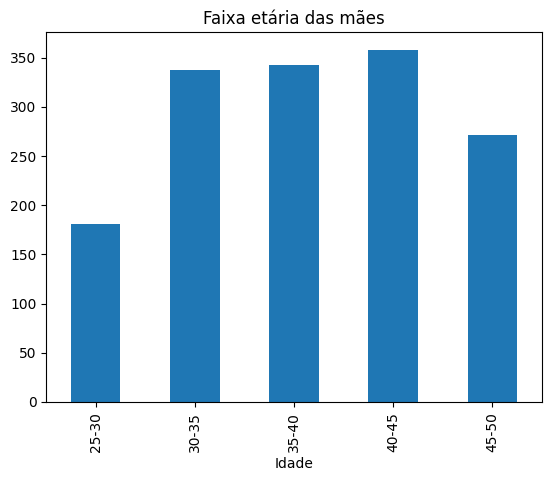

In [156]:

counts = df['Idade'].value_counts().sort_index()

counts.plot.bar()
plt.title('Faixa etária das mães')
plt.show()



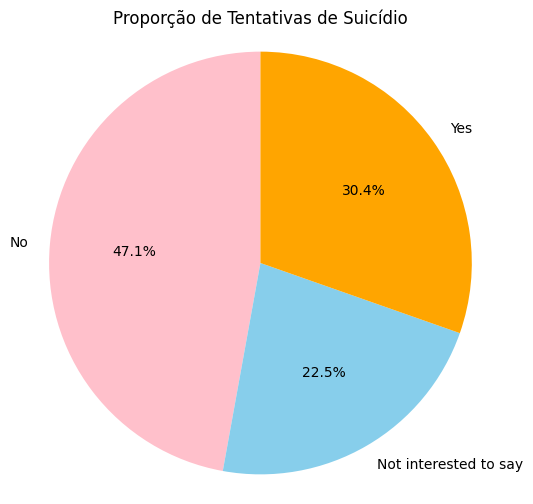

In [157]:

df_suicide = df['Tentativa_suicidio'].value_counts()
labels = df_suicide.sort_index().index

plt.figure(figsize=(6, 6))
cores = ['pink', 'skyblue', 'orange']
plt.pie(df_suicide.sort_index(), labels=labels, autopct='%1.1f%%', startangle=90, colors=cores)
plt.title("Proporção de Tentativas de Suicídio")
plt.axis('equal')
plt.show()

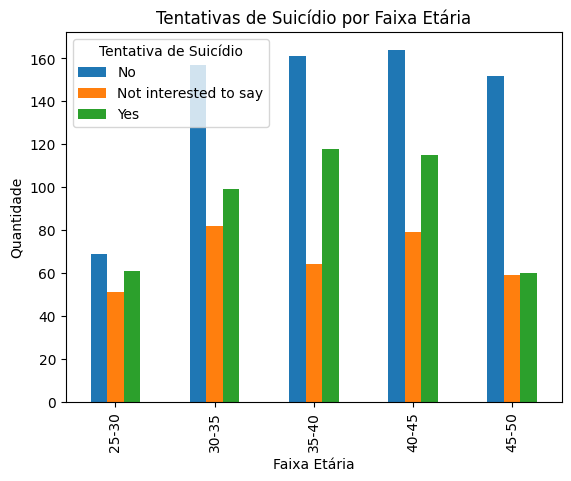

In [188]:
# Gráfico que relaciona tentativas de suicídio por faixa etária. 

df_suicide_age = df.groupby('Idade')['Tentativa_suicidio'].value_counts().unstack()
df_suicide_age.plot.bar()

plt.title('Tentativas de Suicídio por Faixa Etária')
plt.ylabel('Quantidade')
plt.xlabel('Faixa Etária')
plt.legend(title='Tentativa de Suicídio')
plt.show()

In [262]:
df_suicide.sum()

Tentativa_suicidio
No                       703
Not interested to say    335
Yes                      453
dtype: int64

Text(0.5, 1.0, 'Se sente ansiosa')

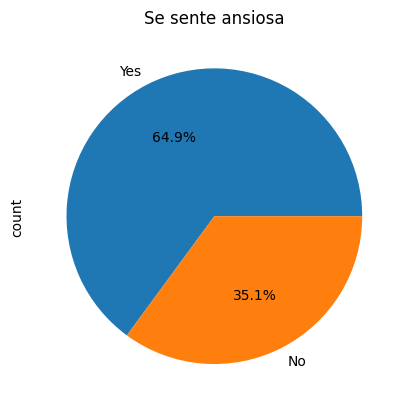

In [261]:
df_ansiedade = df['Ansiosa'].value_counts()
labels = df_ansiedade.index
df_ansiedade.plot.pie(labels = labels, autopct='%1.1f%%')
plt.title('Se sente ansiosa')

In [192]:

df.groupby('Triste_chorosa')['Ansiosa'].value_counts().unstack()

Ansiosa,No,Yes
Triste_chorosa,,
No,161,360
Sometimes,173,270
Yes,189,338


In [195]:
df.groupby('Culpa')['problema_afeto'].value_counts().unstack()

problema_afeto,No,Sometimes,Yes
Culpa,,,
Maybe,132,247,149
No,229,224,168
Yes,193,68,81


In [1]:
df.groupby('Tentativa_suicidio')['Triste_chorosa', 'Insonia', 'Ansiosa', 'Culpa'].mean()


NameError: name 'df' is not defined